In [1]:
import os.path

from data.dataset import MriDataset

In [2]:
dataset=MriDataset()

In [3]:
dataset.setup(stage="fit")

In [7]:
dataset

In [4]:
import torch
for batch in dataset.train_dataloader():
    print("batch shape: ", batch[0].shape)
    print(f" labels shape: {batch[1].shape} ")
    print(f" unique values labels {torch.unique(batch[1]).tolist()}")
    break

batch shape:  torch.Size([64, 3, 224, 224])
 labels shape: torch.Size([64]) 
 unique values labels [0, 1, 2, 3]


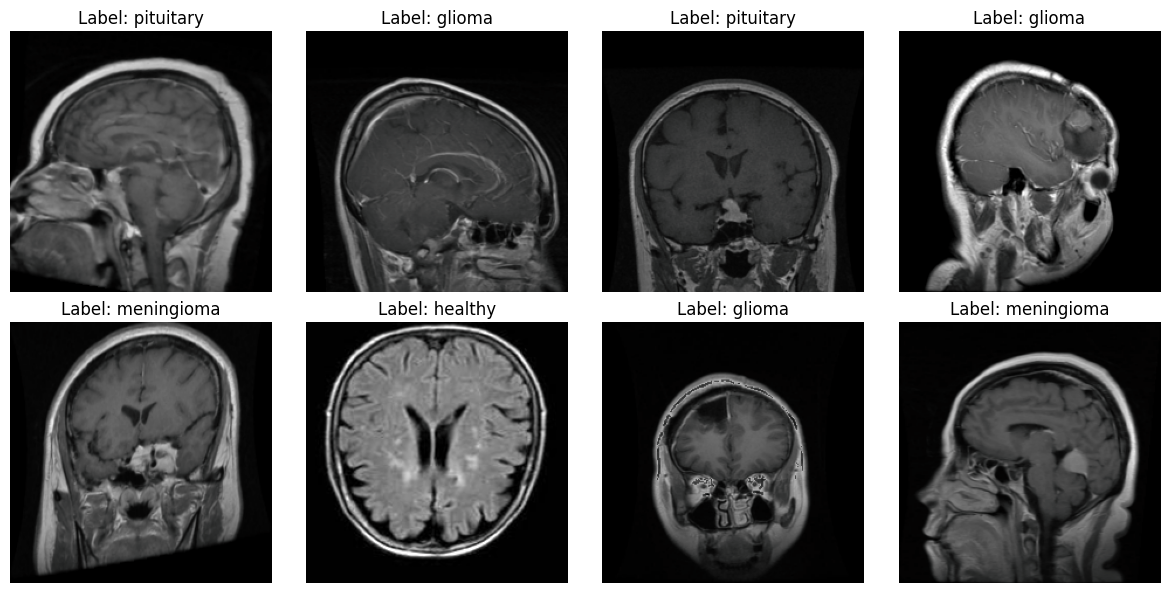

In [5]:
idx_to_labels: dict = {0: "glioma", 1: "healthy", 2: "meningioma", 3: "pituitary"}
import torch
import matplotlib.pyplot as plt
from PIL import Image  # Importing Image correctly

# Number of images to display
num_images = 8

mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Create a figure with subplots
plt.figure(figsize=(12, 6))

def denormalize(tensor):
    tensor = tensor * std[:, None, None] + mean[:, None, None]  # Reverse normalization
    tensor = tensor.clamp(0, 1) * 255  # Scale to [0, 255] and clamp
    return tensor.to(torch.uint8)

for batch_idx, (x, y) in enumerate(dataset.train_dataloader()):
    batch_size, channels, height, width = x.shape  # Unpack the batch shape

    # Loop through the number of images to display
    for i in range(num_images):
        random_idx = torch.randint(low=0, high=batch_size, size=(1,)).item()  # Random index

        image = x[random_idx]  # Select the image
        image = denormalize(image).permute(1, 2, 0).numpy() 

        label = y[random_idx].item() 

        plt.subplot(2, 4, i + 1)  # 2x4 grid for 8 images
        plt.imshow(image)  # Display the image
        plt.title(f"Label: {idx_to_labels[label]}")
        plt.axis('off')  # Hide axes

    break  # Only use the first batch

plt.tight_layout()
plt.show()

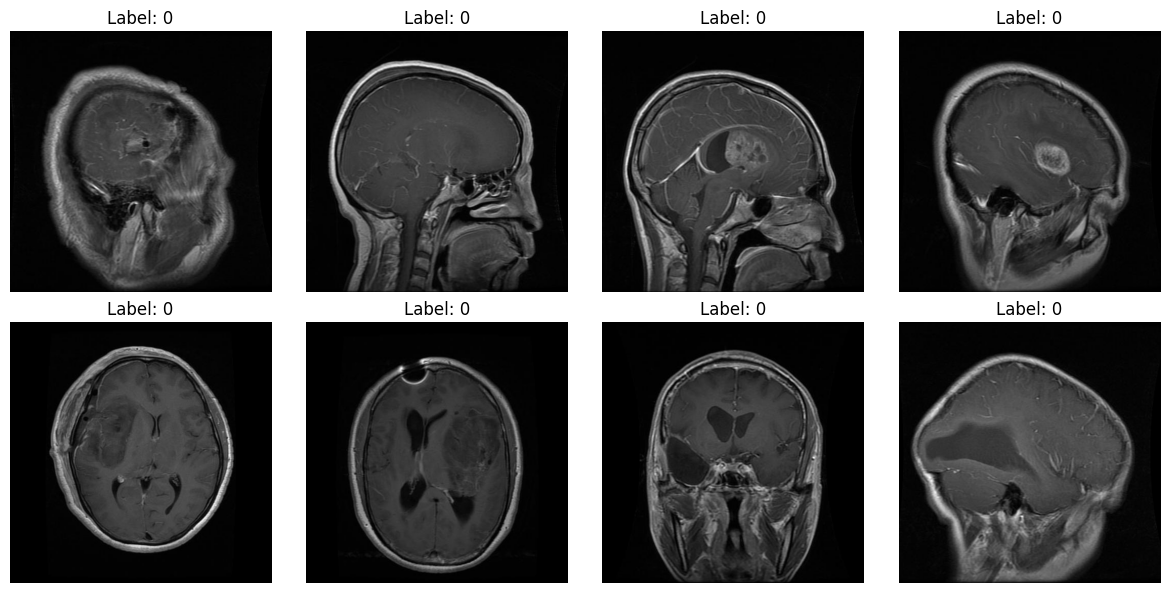

In [10]:
import torch
import matplotlib.pyplot as plt
from PIL import Image  # Importing Image correctly

# Number of images to display
num_images = 8

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Loop through the dataset and display images
for i, (x, y) in enumerate(dataset.mri_dataset, start=1):
    # Load the image using PIL
    img = Image.open(x) if isinstance(x, str) else x  # Ensure x is a path string or a tensor
    
    plt.subplot(2, 4, i)  # Create subplots
    plt.imshow(img, cmap='gray')  # Show the image (assuming grayscale; change cmap as needed)
    plt.title(f"Label: {int(y)}")
    plt.axis('off')  # Turn off axis

    if i == num_images:  # Display a limited number of images
        break

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [11]:
from model.build import Swin4MRI

In [12]:
model=Swin4MRI(num_classes=4, use_cls_token=False, freeze_percentage=90)

Total Parameters: 86,747,524
Trainable Parameters: 27,310,860
Frozen 384/427 layers.
trainable parameters number = 27310860/86747524


In [14]:
# test forward pass
batch= next(iter(dataset.train_dataloader()))
targets =batch[1]
batch=batch[0]
with torch.no_grad():
    predicted_logits = model.forward(batch)
    print(f"shape of y {targets.shape}")
    print(f"shape of predicted logits: {predicted_logits.shape}")

shape of y torch.Size([64])
shape of predicted logits: torch.Size([64, 4])


In [16]:
# backwords pass

result_dict = model.training_step(batch,1)

RuntimeError: Swin4MRI is not attached to a `Trainer`.

# Inference mode

In [2]:
from scripts.predict import InferenceModel

In [3]:
import os
os.path.exists('C:/Users/Iheb/Desktop/projects/cats-vs-dogs-pytorch-transformers-SWIN-v1/logs/MRI_model/version_1/checkpoints/epoch=9-step=770.ckpt')

True

In [4]:
model = InferenceModel()

Total Parameters: 86,747,524
Trainable Parameters: 51,760,380
Frozen 256/427 layers.
trainable parameters number = 51760380/86747524


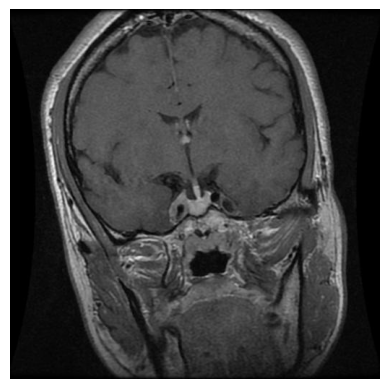

In [5]:
import IPython.display
img1_path=r"C:\Users\Iheb\Desktop\projects\cats-vs-dogs-pytorch-transformers-SWIN-v1\data_folder\brain-tumor-mri-scans\healthy\0009.jpg"

img2_path=r"C:\Users\Iheb\Desktop\projects\cats-vs-dogs-pytorch-transformers-SWIN-v1\data_folder\brain-tumor-mri-scans\pituitary\0007.jpg"

import matplotlib.pyplot as plt
from PIL import Image

# Load your image
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)

data=[img1,img2]

# Display using matplotlib
plt.imshow(img2)
plt.axis('off')  # Hide axes for better visualization
plt.show()



In [6]:
outputs = model.predict(batch=img1,is_batched=False)

In [7]:
outputs

['healthy']

In [8]:
outputs=model.predict(batch=data,is_batched=True)

In [9]:
outputs

['healthy', 'pituitary']